# Statistics 

**Normality Tests**

A large number of important financial models, like modern or mean-variance portfolio theory (MPT) and the capital asset pricing model (CAPM), rest on the assumption that returns of securities are normally distributed. Therefore, this chapter presents approaches to test a given time series for normality of returns.

**Portfolio Optimization**

MPT can be considered one of the biggest successes of statistics in finance. Starting in the early 1950s with the work of pioneer Harry Markowitz, this theory began to replace people’s reliance on judgment and experience with rigorous mathematical and statistical methods when it comes to the investment of money in financial markets. In that sense, it is maybe the first real quantitative model and approach in finance.

**Bayesian Statistics**

On a conceptual level, Bayesian statistics introduces the notion of beliefs of agents and the updating of beliefs to statistics. When it comes to linear regression, this might take the form of having a statistical distribution for regression parameters instead of single point estimates (e.g., for the intercept and slope of the regression line). Nowadays, Bayesian methods are widely used in finance, which is why this section illustrates Bayesian methods based on some examples.

**Machine Learning**

Machine learning (or statistical learning) is based on advanced statistical methods and is considered a subdiscipline of artificial intelligence (AI). Like statistics itself, machine learning offers a rich set of approaches and models to learn from data sets and create predictions based on what is learned. Different algorithms of learning are distinguished, such as those for supervised learning or unsupervised learning. The types of problems solved by the algorithms differ as well, such as estimation or classification. The examples presented in this chapter fall in the category of supervised learning for classification.


**Portfolio Theory**

When stock returns are normally distributed, optimal portfolio choice can be cast into a setting where only the (expected) mean return and the variance of the returns (or the volatility) as well as the covariances between different stocks are relevant for an investment decision (i.e., an optimal portfolio composition).

**Capital Asset Pricing Model**

Again, when stock returns are normally distributed, prices of single stocks can be elegantly expressed in linear relationship to a broad market index; the relationship is generally expressed by a measure for the co-movement of a single stock with the market index called beta or β.

**Efficient Markets Hypothesis**

An efficient market is a market where prices reflect all available information, where “all” can be defined more narrowly or more widely (e.g., as in “all publicly available” information vs. including also “only privately available” information). If this hypothesis holds true, then stock prices fluctuate randomly, and returns are normally distributed.

**Option Pricing Theory**

Brownian motion is the benchmark model for the modeling of random price movements of financial instruments; the famous Black-Scholes-Merton option pricing formula uses a geometric Brownian motion as the model for a stock’s random price fluctuations over time, leading to log-normally distributed prices and normally distributed returns.

This by far nonexhaustive list underpins the importance of the normality assumption in finance.


**Benchmark Case**

In [2]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

**Montecarlo Simulation**

In [5]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    '''
    # Calculate the time step size
    dt = T / M

    # Initialize an array to hold the paths
    paths = np.zeros((M + 1, I))

    # The first row of the paths array is set to the initial stock/index value
    paths[0] = S0

    # Loop over each time step after the initial one
    for t in range(1, M + 1):
        # Generate a standard normal random variable for each path
        rand = np.random.standard_normal(I)

        # Standardize the random numbers to have mean 0 and standard deviation 1
        rand = (rand - rand.mean()) / rand.std()

        # Calculate the new path values based on the geometric Brownian motion formula
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                          sigma * math.sqrt(dt) * rand)
    # Return the array of paths
    return paths

Simulation with 250,000 paths with 50 steps each

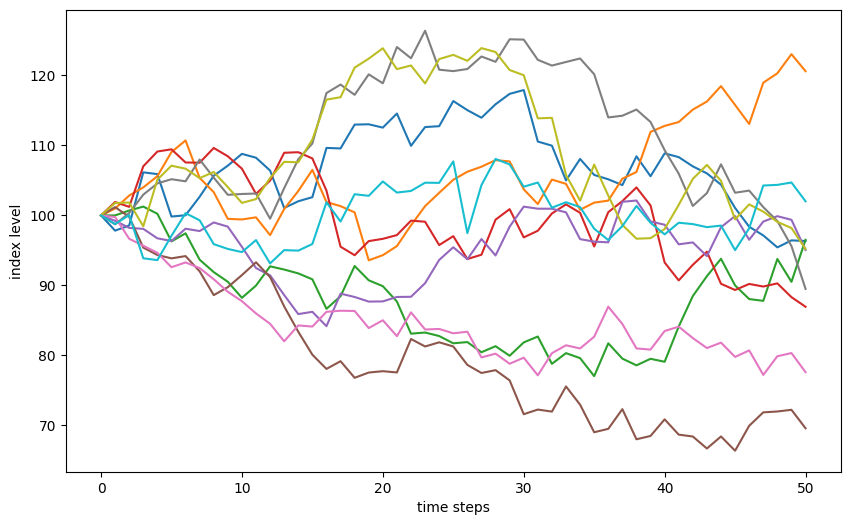

In [6]:
# Set the initial stock price
S0 = 100.

# Set the risk-free rate
r = 0.05

# Set the volatility of the stock
sigma = 0.2

# Set the time horizon
T = 1.0

# Set the number of time steps
M = 50

# Set the number of paths to simulate
I = 250000

# Set the seed for the random number generator to ensure reproducibility
np.random.seed(1000)

# Generate the paths
paths = gen_paths(S0, r, sigma, T, M, I)

# Calculate the theoretical end price of the stock using the formula for geometric Brownian motion
theoretical_end_price = S0 * math.exp(r * T)

# Calculate the mean end price of the simulated paths
mean_end_price = paths[-1].mean()

# Plot the first 10 simulated paths
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')
plt.show()

# Get the first simulated path and round each value to 4 decimal places
first_path = paths[:, 0].round(4)

# Calculate the log returns of the paths
log_returns = np.log(paths[1:] / paths[:-1])

# Get the log returns of the first path and round each value to 4 decimal places
first_path_log_returns = log_returns[:, 0].round(4)

In [7]:
# Get the first simulated path and round each value to 4 decimal places
first_path = paths[:, 0].round(4)

# Calculate the log returns of the paths
log_returns = np.log(paths[1:] / paths[:-1])

# Get the log returns of the first path and round each value to 4 decimal places
first_path_log_returns = log_returns[:, 0].round(4)

In [8]:
import numpy as np
import scipy.stats as scs
import math

def print_statistics(array):
    ''' 
    Prints selected statistics.

    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    # Use scipy's describe function to calculate statistics
    sta = scs.describe(array)
    
    # Print the statistics
    print(f"{'statistic':<14} {'value':>15}")
    print(30 * '-')
    print(f"{'size':<14} {sta[0]:>15.5f}")
    print(f"{'min':<14} {sta[1][0]:>15.5f}")
    print(f"{'max':<14} {sta[1][1]:>15.5f}")
    print(f"{'mean':<14} {sta[2]:>15.5f}")
    print(f"{'std':<14} {np.sqrt(sta[3]):>15.5f}")
    print(f"{'skew':<14} {sta[4]:>15.5f}")
    print(f"{'kurtosis':<14} {sta[5]:>15.5f}")

# Flatten the log_returns array and print its statistics
print_statistics(log_returns.flatten())

# Calculate and print the expected log return at the end of the simulation period
expected_end_log_return = log_returns.mean() * M + 0.5 * sigma ** 2
print(f"Expected end log return: {expected_end_log_return}")

# Calculate and print the expected volatility at the end of the simulation period
expected_end_volatility = log_returns.std() * math.sqrt(M)
print(f"Expected end volatility: {expected_end_volatility}")

statistic                value
------------------------------
size            12500000.00000
min                   -0.15664
max                    0.15371
mean                   0.00060
std                    0.02828
skew                   0.00055
kurtosis               0.00085
Expected end log return: 0.05000000000000006
Expected end volatility: 0.20000000000000015


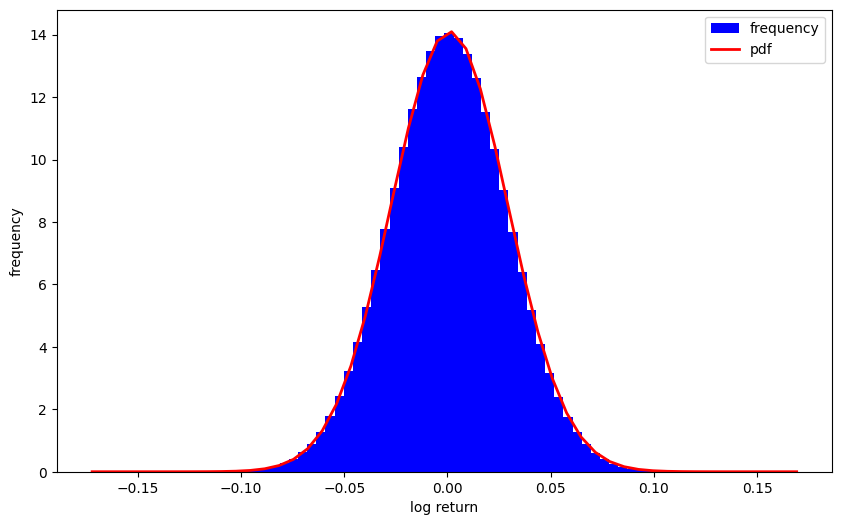

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot a histogram of the log returns
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency', color='b')

# Set the labels for the x and y axes
plt.xlabel('log return')
plt.ylabel('frequency')

# Generate a range of x values spanning the x-axis of the plot
x = np.linspace(plt.axis()[0], plt.axis()[1])

# Calculate the PDF of the normal distribution with mean r/M and standard deviation sigma/sqrt(M)
pdf = scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M))

# Plot the PDF
plt.plot(x, pdf, 'r', lw=2.0, label='pdf')

# Add a legend to the plot
plt.legend()


**Frequency Interpretation:**

In the context of the histogram, the term "frequency" refers to the number of occurrences or observations within each bin of the histogram. Each bin represents a range of log return values, and the height of the bar in each bin corresponds to the number of observations falling within that range. In the provided code, the `density=True` parameter indicates that the histogram is normalized, representing the relative frequency rather than the absolute count. This allows for a comparison with the probability density function (PDF) of the normal distribution.

The visualization helps assess how well the observed log returns align with the expected distribution, providing insights into the shape and characteristics of the data distribution.


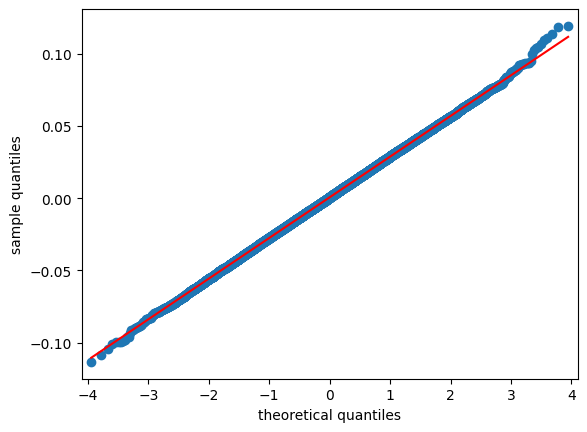

In [10]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

**Skewness Test (`skewtest()`)**

This test evaluates whether the skewness of the sample data is "normal," meaning it has a value close enough to zero.

**Kurtosis Test (`kurtosistest()`)**

Similarly, this test assesses whether the kurtosis of the sample data is "normal," indicating a value close enough to zero.

**Normality Test (`normaltest()`)**

This test combines the other two approaches (skewness and kurtosis tests) to provide a comprehensive evaluation for normality. The goal is to check if the distribution of the sample data is close enough to a normal distribution.


In [11]:
import scipy.stats as scs

def normality_tests(arr):
    ''' 
    Tests for normality distribution of given data set.

    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    # Calculate and print skewness and skewness test p-value
    print(f"{'Skew of data set':<20} {scs.skew(arr):>14.3f}")
    print(f"{'Skew test p-value':<20} {scs.skewtest(arr)[1]:>14.3f}")
    
    # Calculate and print kurtosis and kurtosis test p-value
    print(f"{'Kurt of data set':<20} {scs.kurtosis(arr):>14.3f}")
    print(f"{'Kurt test p-value':<20} {scs.kurtosistest(arr)[1]:>14.3f}")
    
    # Calculate and print normality test p-value
    print(f"{'Norm test p-value':<20} {scs.normaltest(arr)[1]:>14.3f}")

# Flatten the log_returns array and perform normality tests
normality_tests(log_returns.flatten())

Skew of data set              0.001
Skew test p-value             0.430
Kurt of data set              0.001
Kurt test p-value             0.541
Norm test p-value             0.607


**Skewness and Kurtosis Test Results**

- **Skew of data set:** 0.001  
  The skewness measures the asymmetry of the data distribution. A value of 0 indicates perfect symmetry.

- **Skew test p-value:** 0.430  
  The p-value associated with the skewness test. A higher p-value (closer to 1) suggests that the skewness is not significantly different from zero, supporting the hypothesis of a normal distribution.

- **Kurt of data set:** 0.001  
  The kurtosis measures the tail heaviness of the distribution. A value of 0 suggests normal tail length.

- **Kurt test p-value:** 0.541  
  The p-value associated with the kurtosis test. A higher p-value suggests that the kurtosis is not significantly different from the normal distribution.

- **Norm test p-value:** 0.607  
  The p-value associated with a comprehensive normality test considering both skewness and kurtosis. A higher p-value suggests no strong evidence to reject the hypothesis of normality for the entire distribution.


Text(0.5, 1.0, 'log data')

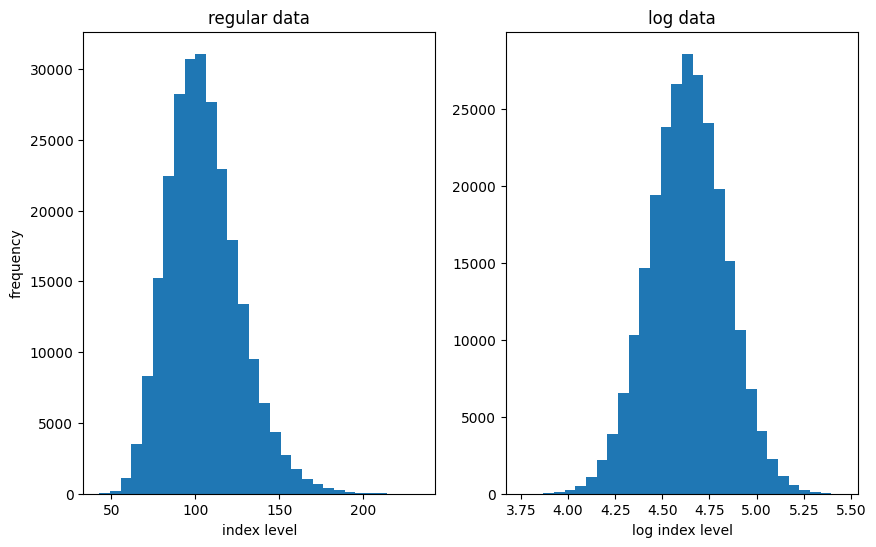

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')


statistic                value
------------------------------
size              250000.00000
min                   42.74870
max                  233.58435
mean                 105.12645
std                   21.23174
skew                   0.61116
kurtosis               0.65182
statistic                value
------------------------------
size              250000.00000
min                    3.75534
max                    5.45354
mean                   4.63517
std                    0.19998
skew                  -0.00092
kurtosis              -0.00327
Skew of data set             -0.001
Skew test p-value             0.851
Kurt of data set             -0.003
Kurt test p-value             0.744
Norm test p-value             0.931


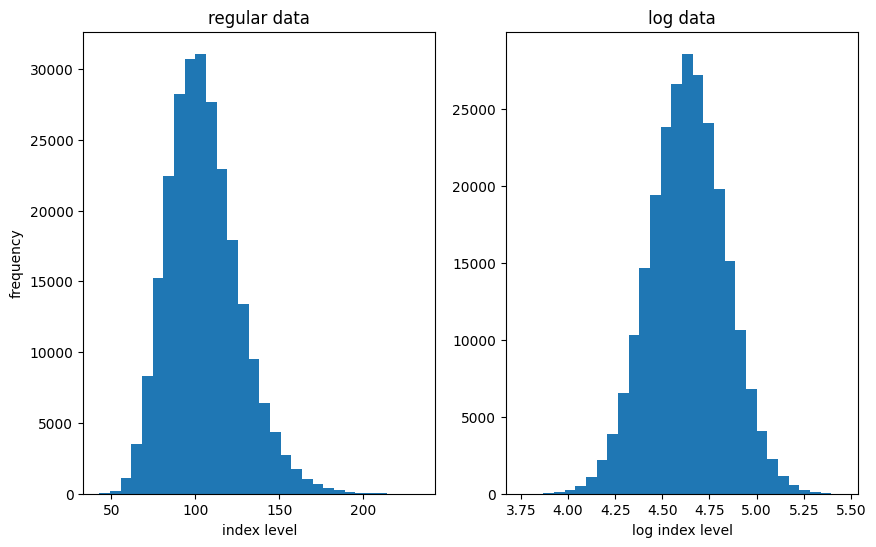

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 1x2 subplot with a size of 10x6
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot a histogram of the last row of paths on the first subplot
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')

# Plot a histogram of the log of the last row of paths on the second subplot
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

# Print the statistics of the last row of paths
print_statistics(paths[-1])

# Print the statistics of the log of the last row of paths
print_statistics(np.log(paths[-1]))

# Perform normality tests on the log of the last row of paths
normality_tests(np.log(paths[-1]))

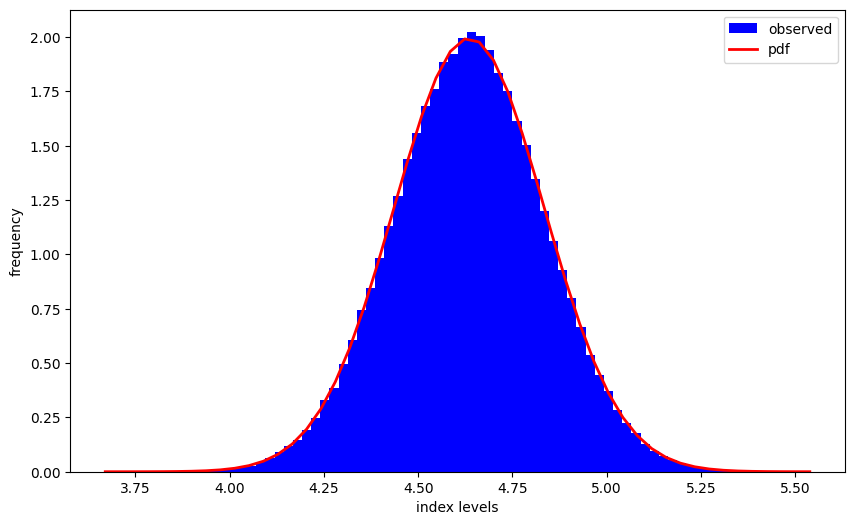

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Calculate the log of the last row of paths
log_data = np.log(paths[-1])

# Plot a histogram of the log data
plt.hist(log_data, bins=70, density=True, label='observed', color='b')

# Set the labels for the x and y axes
plt.xlabel('index levels')
plt.ylabel('frequency')

# Generate a range of x values spanning the x-axis of the plot
x = np.linspace(plt.axis()[0], plt.axis()[1])

# Calculate the PDF of the normal distribution with mean and standard deviation of the log data
pdf = scs.norm.pdf(x, log_data.mean(), log_data.std())

# Plot the PDF
plt.plot(x, pdf, 'r', lw=2.0, label='pdf')

# Add a legend to the plot
plt.legend()

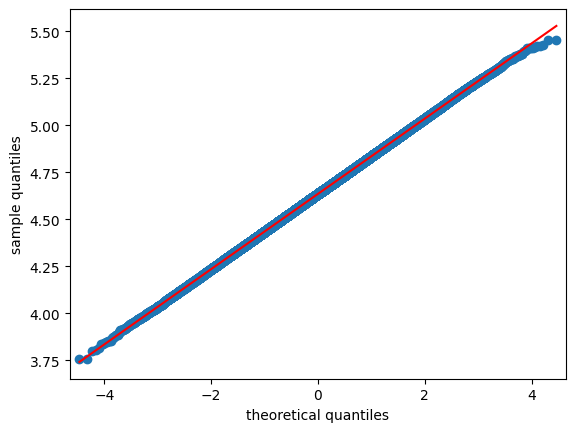

In [15]:
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

# Real Time Data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1972 non-null   float64
 1   GLD     1972 non-null   float64
 2   AAPL.O  1972 non-null   float64
 3   MSFT.O  1972 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB
               SPY     GLD     AAPL.O  MSFT.O
Date                                         
2010-01-04  113.33  109.80  30.572827  30.950
2010-01-05  113.63  109.70  30.625684  30.960
2010-01-06  113.71  111.51  30.138541  30.770
2010-01-07  114.19  110.82  30.082827  30.452
2010-01-08  114.57  111.37  30.282827  30.660


<Axes: xlabel='Date'>

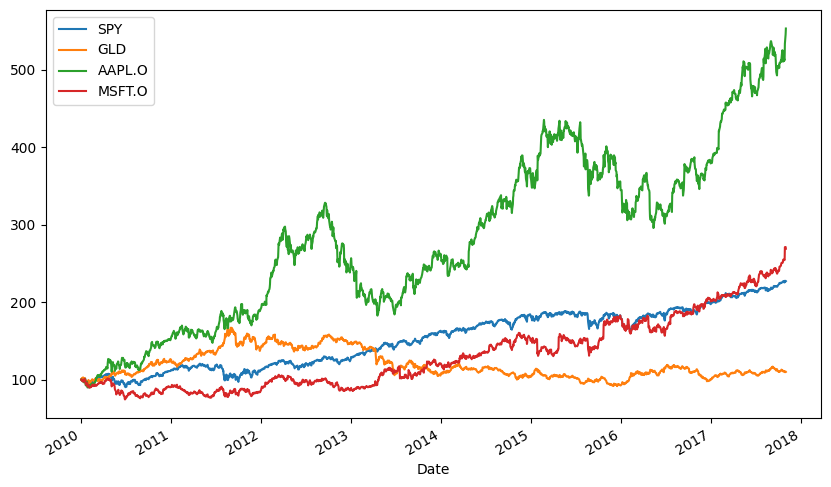

In [17]:
import pandas as pd

# Replace 'your_path_here' with the actual path to your CSV file
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

# Filter the data for the selected symbols and drop any missing values
data = raw[symbols].dropna()

# Print information about the data
data.info()

# Print the first few rows of the data
print(data.head())

# Normalize the data to 100 and plot
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

                 SPY       GLD    AAPL.O    MSFT.O
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.002644 -0.000911  0.001727  0.000323
2010-01-06  0.000704  0.016365 -0.016034 -0.006156
2010-01-07  0.004212 -0.006207 -0.001850 -0.010389
2010-01-08  0.003322  0.004951  0.006626  0.006807


array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

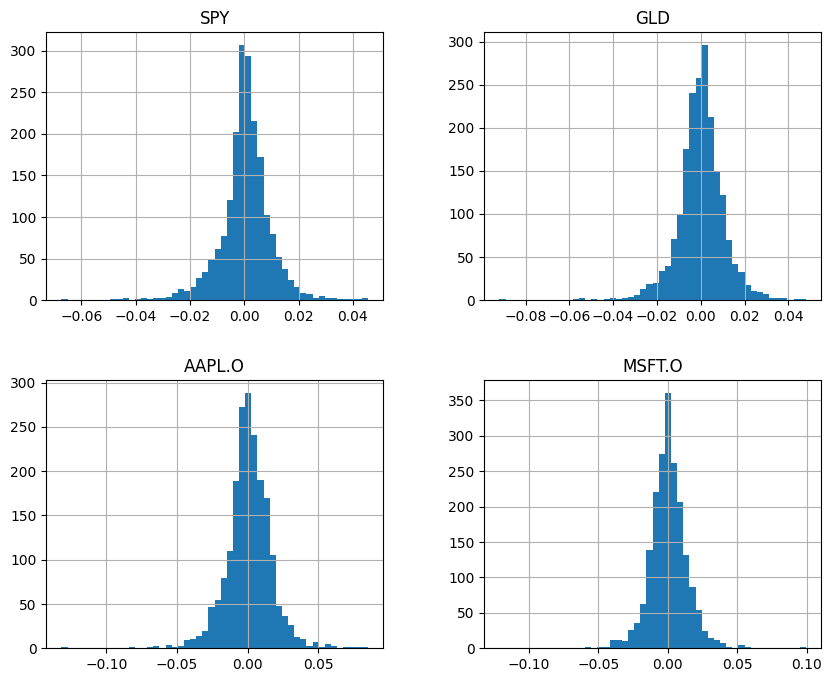

In [18]:

# Calculate the log returns
log_returns = np.log(data / data.shift(1))

# Print the first few rows of the log returns
print(log_returns.head())

# Plot a histogram of the log returns
log_returns.hist(bins=50, figsize=(10, 8))

The histogram provides insights into the volatility and distribution of returns for each financial instrument. Traders and analysts often use such visualizations to assess the risk and potential rewards associated with different assets. Higher peaks and wider distributions may indicate higher volatility, while narrower distributions may suggest more stable returns.

In [19]:
# Iterate over each symbol in the symbols list
for sym in symbols:
    # Print the symbol
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    
    # Calculate the log returns for the current symbol and drop any missing values
    log_data = np.array(log_returns[sym].dropna())
    
    # Print the statistics for the log returns of the current symbol
    print_statistics(log_data)


Results for symbol SPY
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.06734
max                    0.04545
mean                   0.00042
std                    0.00934
skew                  -0.46886
kurtosis               4.54265

Results for symbol GLD
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.09191
max                    0.04795
mean                   0.00005
std                    0.01048
skew                  -0.60078
kurtosis               5.42113

Results for symbol AAPL.O
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.13187
max                    0.08502
mean                   0.00087
std                    0.01605
skew                  -0.26179
kurtosis               4.9

Results for symbol SPY
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.06734
max                    0.04545
mean                   0.00042
std                    0.00934
skew                  -0.46886
kurtosis               4.54265

Results for symbol GLD
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.09191
max                    0.04795
mean                   0.00005
std                    0.01048
skew                  -0.60078
kurtosis               5.42113

Results for symbol AAPL.O
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.13187
max                    0.08502
mean                   0.00087
std                    0.01605
skew                  -0.26179
kurtosis               4.92237

Results for symbol MSFT.O
------------------------------
statistic                value
------------------------------
size                1971.00000
min                   -0.12103
max                    0.09941
mean                   0.00050
std                    0.01412
skew                  -0.10110
kurtosis               7.70109

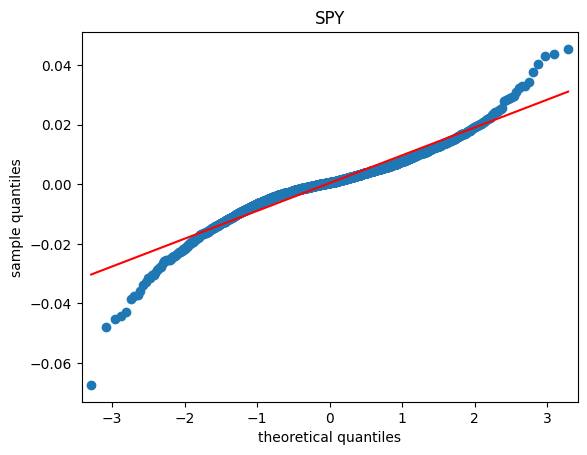

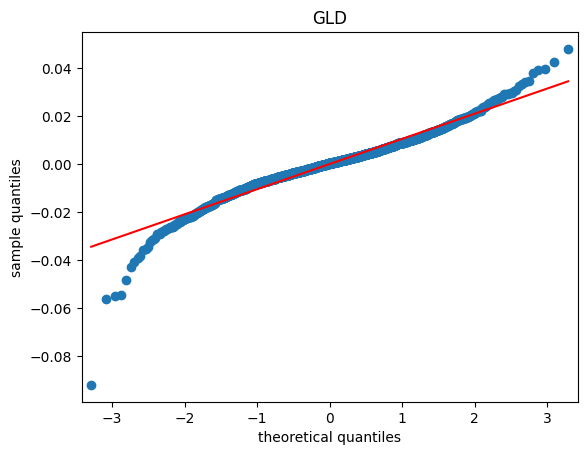

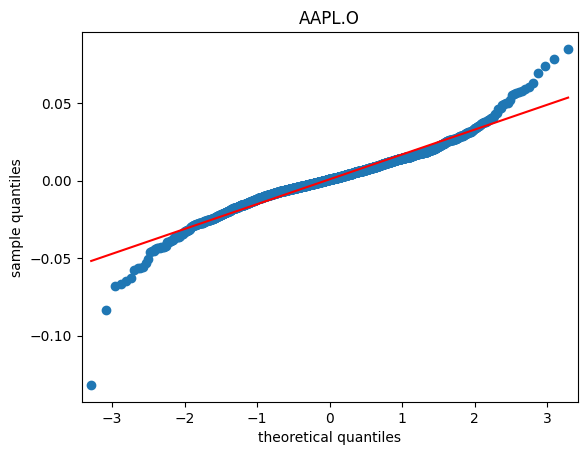

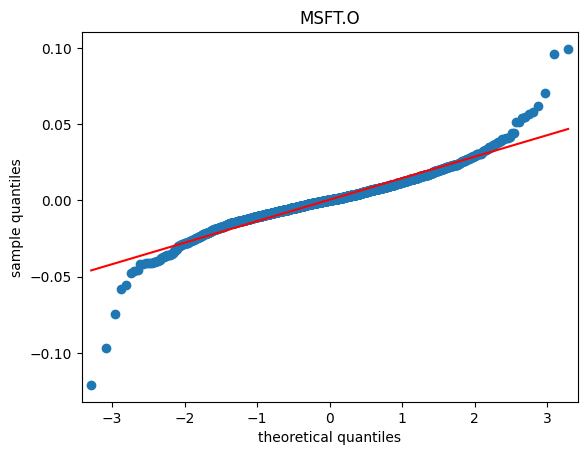

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Iterate over each symbol in the symbols list
for sym in symbols:
    # Generate a QQ plot for the log returns of the current symbol
    sm.qqplot(log_returns[sym].dropna(), line='s')
    
    # Set the title of the plot to the current symbol
    plt.title(sym)
    
    # Set the labels for the x and y axes
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')
    
    # Display the plot
    plt.show()

In [21]:
# Iterate over each symbol in the symbols list
for sym in symbols:
    # Print the symbol
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    
    # Calculate the log returns for the current symbol and drop any missing values
    log_data = np.array(log_returns[sym].dropna())
    
    # Perform normality tests on the log returns of the current symbol
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set             -0.469
Skew test p-value             0.000
Kurt of data set              4.543
Kurt test p-value             0.000
Norm test p-value             0.000

Results for symbol GLD
--------------------------------
Skew of data set             -0.601
Skew test p-value             0.000
Kurt of data set              5.421
Kurt test p-value             0.000
Norm test p-value             0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set             -0.262
Skew test p-value             0.000
Kurt of data set              4.922
Kurt test p-value             0.000
Norm test p-value             0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set             -0.101
Skew test p-value             0.067
Kurt of data set              7.701
Kurt test p-value             0.000
Norm test p-value             0.000


Results for symbol SPY:
Skew of data set: -0.469

The skewness is negative, indicating a slightly left-skewed distribution. This suggests that there is a tendency for more extreme negative returns than would be expected in a perfectly symmetric distribution.
Skew test p-value: 0.000

The p-value is very low, indicating strong evidence against the null hypothesis of a normally distributed dataset. This supports the observation of non-normality in the data.
Kurt of data set: 4.543

The kurtosis is elevated, indicating moderately fat tails in the distribution. This suggests a higher likelihood of extreme returns, both positive and negative, compared to a normal distribution.
Kurt test p-value: 0.000

The low p-value rejects the null hypothesis of normal kurtosis, further supporting the evidence of fat tails.
Norm test p-value: 0.000

The low p-value rejects the null hypothesis of normality, providing additional evidence against a normal distribution.
Results for symbol GLD:
Skew of data set: -0.601

The skewness is negative, indicating a left-skewed distribution for GLD. Similar to SPY, there is a tendency for more extreme negative returns.
Skew test p-value: 0.000

The low p-value supports the rejection of the null hypothesis of normal skewness.
Kurt of data set: 5.421

The kurtosis is elevated, suggesting fat tails and a higher probability of extreme returns for GLD.
Kurt test p-value: 0.000

The low p-value rejects the null hypothesis of normal kurtosis.
Norm test p-value: 0.000

The low p-value rejects the null hypothesis of normality for GLD.
Results for symbol AAPL.O:
Skew of data set: -0.262

The skewness is slightly negative, indicating a subtle left skew in the distribution of AAPL.O returns.
Skew test p-value: 0.000

The low p-value suggests non-normal skewness.
Kurt of data set: 4.922

The kurtosis is elevated, indicating moderately fat tails in the distribution.
Kurt test p-value: 0.000

The low p-value rejects the null hypothesis of normal kurtosis.
Norm test p-value: 0.000

The low p-value rejects the null hypothesis of normality for AAPL.O.
Results for symbol MSFT.O:
Skew of data set: -0.101

The skewness is close to zero, suggesting a relatively symmetric distribution for MSFT.O returns.
Skew test p-value: 0.067

The p-value is higher than typical significance levels (e.g., 0.05), suggesting weaker evidence against normal skewness. The distribution may be closer to symmetric.
Kurt of data set: 7.701

The kurtosis is significantly elevated, indicating very fat tails and a higher probability of extreme returns for MSFT.O.
Kurt test p-value: 0.000

The low p-value rejects the null hypothesis of normal kurtosis.
Norm test p-value: 0.000

The low p-value rejects the null hypothesis of normality for MSFT.O.
Financial Implications:
Skewness: Negative skewness suggests a higher likelihood of extreme negative returns. This has implications for risk management and hedging strategies.

Kurtosis: Elevated kurtosis indicates fat tails, implying a higher risk of extreme events. Investors may need to account for the potential impact of large price movements.

Normality Tests: Rejection of normality in skewness, kurtosis, and overall distribution implies that standard assumptions based on normal distributions may not be appropriate. Financial models and risk assessments should consider the non-normal characteristics of the data.

MSFT.O Skew Test P-value: While the skewness for MSFT.O is close to zero, the p-value suggests weak evidence against normal skewness. The distribution may be more symmetric compared to the other symbols.

In summary, these statistical results highlight non-normality and fat tails in the distributions of returns for the given financial instruments, providing valuable insights for risk management and financial modeling.